0階をスタート地点とする。サイコロを振って出た目の数によって次の階数分のぼる。  
・1,2 => 1段下がる（0未満にはならない）  
・3,4,5 => 1段上がる  
・6 => サイコロをもう一回振って、出た目の数だけ上がる  
ただし、毎回振るごとに0.1%の確率で0階に戻る。  
100回振った時点で60階以上にいる確率をシミュレーションにより求める。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 疑似乱数を用意する
np.random.seed(123)

In [5]:
# サイコロを100回振るゲームを1ゲームとして、1000ゲーム行う
all_walks = []
for i in range(1000) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1, 7)
        # 階段ののぼり方
        if dice <= 2 :
            step = max(0, step - 1)
        elif dice > 2 and dice <= 5 :
            step = step + 1
        else :
            step = step + np.random.randint(1, 7)
        if np.random.rand() <= 0.001 :
            step = 0
        # 1回のゲームの過程をrandom_walkに格納する
        random_walk.append(step)
    # 100回のゲームのそれぞれの過程をall_walksに格納する
    all_walks.append(random_walk)

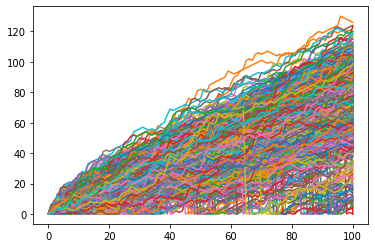

In [6]:
# all_walksをnumpy配列に変換する
np_all_walks = np.array(all_walks) # 1000 x 100 次元

# x軸をサイコロを振った回数(0-100)、y軸を階数にするためnp_all_walksを転置する
np_all_walks_t = np.transpose(np_all_walks)

plt.plot(np_all_walks_t)
plt.show()

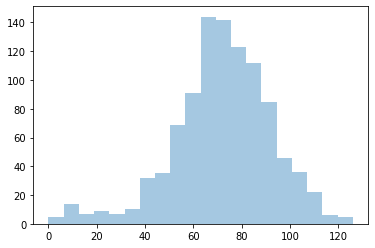

In [16]:
# 各ゲームの最終結果をヒストグラムにする
ends = np.array(np_all_walks_t[-1, :])
sns.distplot(ends, bins = 20, kde = False)

In [21]:
# 1000回のシミュレーションにより、100回振った時点で60階以上にいる確率を求める
n = np.count_nonzero(ends >= 60)
odds = n / len(ends) * 100
print('{:.3}%'.format(odds))

77.6%
